        Instructor: Dr. Shakir Bilal
        Exercise: Weather prediction
        Code type: Mastercode (not for students)


# This Code answers the following
            
            
    Q1.  Consider the New Delhi weather data "New_DelhiData.csv" we have been exploring.
    (a) Calculate mean, and standard deviation for monthly scale. Using the standard deviation you cacluated in the previous step, calcuate 95% confidence intervals around the respective means. Plot the means along with the 95% Confidence intervals.

    (b)Write your observations about the temperature variations using monthly average and 95% confidence intervals. Does the temperature oscilate, stay constant, or follows a random irregular trend? Do you observe seasonal variations?
    
    Q2. Create a linear regression model to predict monthly temperatures using appropriate predictors in the data (e.g. humidity, dewpoint). Comment on your observations. Can you use your linear regression model for predicting temperature into the future? If so plot temperature predictions agains time.
    
    Also consider questions at the end of the this notebook

In [3]:
import numpy as np
import pandas as pd
import math as mt
import statsmodels.api as sm
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import date
import os

### Load the data

In [4]:
path='../Data/'
dataND=pd.read_csv(os.path.join(path,'New_DelhiData.csv'),parse_dates=['datetime_utc'])

In [5]:
dataND.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
dataND.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,2017-04-24 15:00:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,2017-04-24 18:00:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [7]:
dataND.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

#### Checking fo rmissing values in the data

In [8]:
dataND.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

### Plotting the original time series

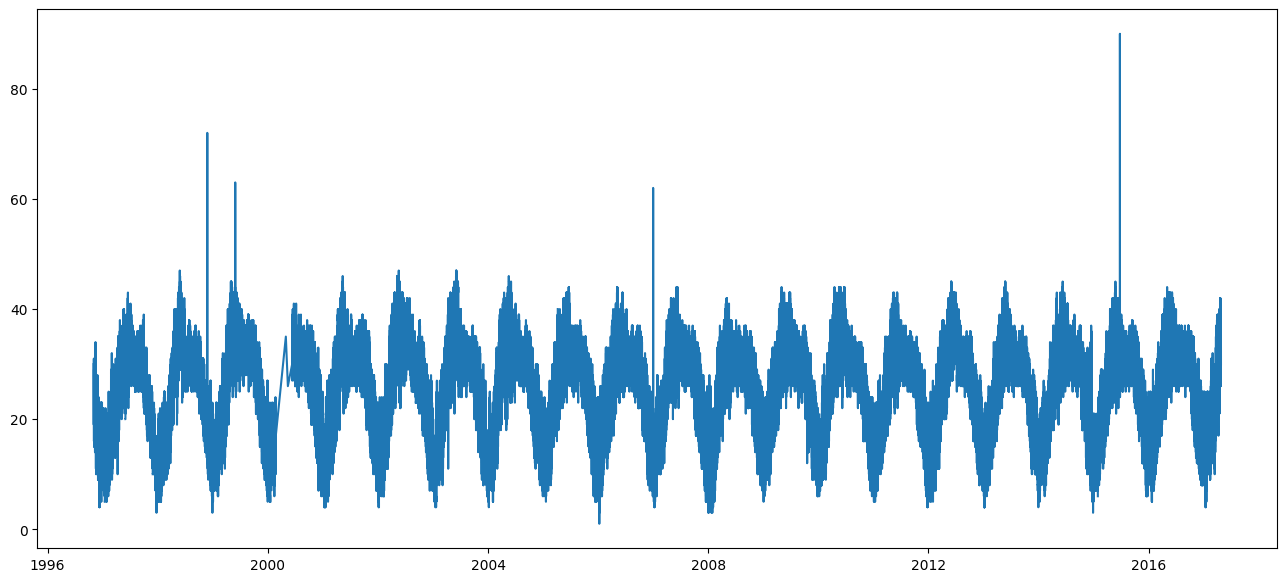

In [9]:
fig, ax = plt.subplots(figsize = (16,7))
ax.plot(dataND['datetime_utc'],dataND[' _tempm'])

In [10]:
dataND.datetime_utc[1].year

1996

In [11]:
dataND.datetime_utc[1].day

1

### Seperating the date into days, months, and years. 
#### It wil be usefull to perform analysis at these three different time scales

In [12]:
dataND['year']=[d.year for d in dataND.datetime_utc]
dataND['month']=[d.strftime('%b') for d in dataND.datetime_utc]
dataND['day']=[d.strftime('%d') for d in dataND.datetime_utc]

In [13]:
dataND['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: int64

#### Looking at what data looks like for one year: the year 2001

In [14]:
yrspan1=[2001]

In [15]:
yr2014=[2014]

In [16]:
datalim1=dataND.loc[dataND.year.isin(yrspan1),:]

In [17]:
datalim2k14=dataND.loc[dataND.year.isin(yr2014),:]

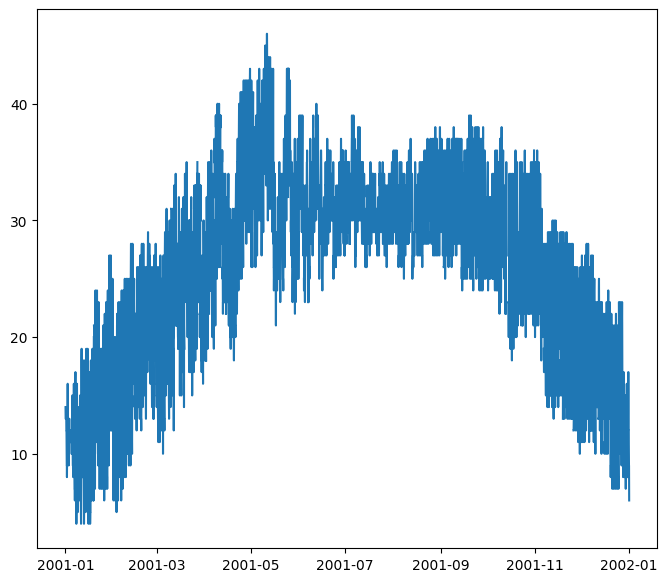

In [18]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(datalim1['datetime_utc'],datalim1[' _tempm'])

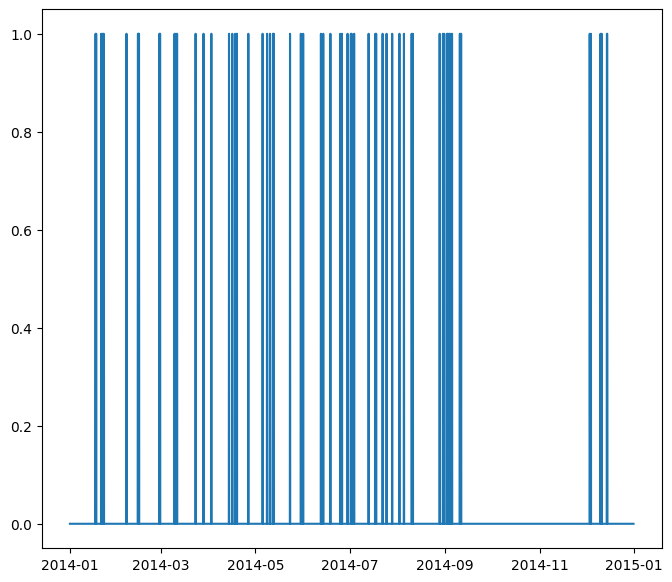

In [19]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(datalim2k14['datetime_utc'],datalim2k14[' _rain'])

#### Diving further and looking what the data looks like in a month: Here chosen month is April

In [20]:
mnlim1=['Apr']

In [21]:
mnlimJan=['Jan']

In [22]:
datalim2=datalim1.loc[datalim1.month.isin(mnlim1),:]

In [23]:
datalimJan=datalim2k14.loc[datalim2k14.month.isin(mnlimJan),:]

In [24]:
len(datalim2.day.unique())

30

In [25]:
len(datalimJan.day.unique())

31

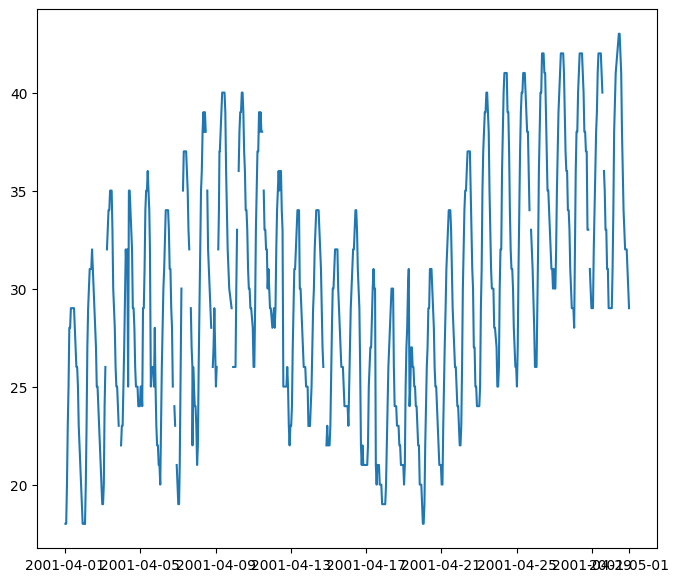

In [26]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(datalim2['datetime_utc'],datalim2[' _tempm'])

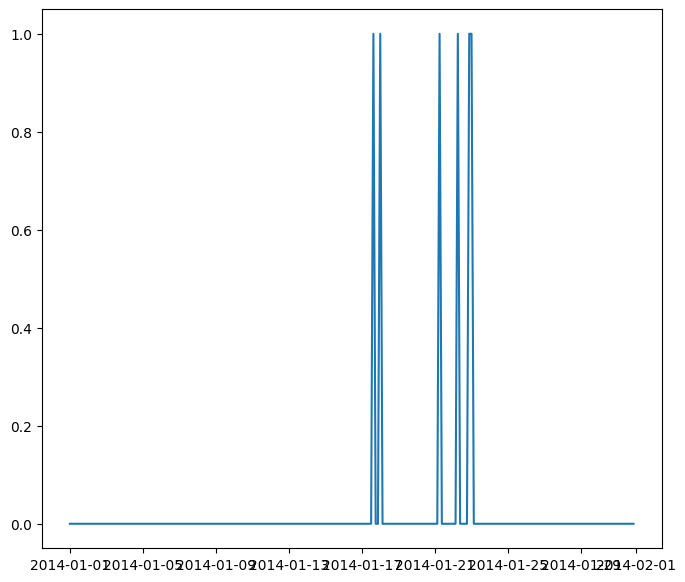

In [27]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(datalimJan['datetime_utc'],datalimJan[' _rain'])

In [28]:
dataND.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm', 'year', 'month', 'day'],
      dtype='object')

#### Creating a function to calculate monthly average, standard deviation for temperature, dewpoint, humidity

In [29]:
#This subroutine cacluates average of monthly data and it's standard deviation
def monthlyavg(dataND):
    avg=[]
    sdev=[]
    avgdew=[]
    sdevdew=[]
    avghum=[]
    sdevhum=[]
    for yr in dataND.year.unique():
        datayr=dataND.loc[dataND.year.isin([yr]),:]
        for mnth in datayr.month.unique():
            datamnth=datayr.loc[datayr.month.isin([mnth]),:]
            avg.append(np.mean(datamnth[' _tempm']))
            sdev.append(np.std(datamnth[' _tempm']))
            avgdew.append(np.mean(datamnth[' _dewptm']))
            sdevdew.append(np.std(datamnth[' _dewptm']))
            avghum.append(np.mean(datamnth[' _hum']))
            sdevhum.append(np.std(datamnth[' _hum']))
    return avg,sdev,avgdew,sdevdew,avghum,sdevhum
        

#### Picking up data for two years 2001 to 2002 
#### and caclulating monthly average, standard deviation for tempreature, dewpoint, humidity valriables.

In [30]:
data2k1=dataND.loc[dataND.year.isin([2001,2002]),:]


In [31]:
mnthavg,mnthstdev,_,_,_,_=monthlyavg(data2k1)

In [32]:
YEAR = [2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,2002, 2002, 2002, 2002, 2002, 2002,2002, 2002, 2002, 2002, 2002, 2002]
#MONTH = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
MONTH = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,1, 2, 3, 4, 5, 6,7,8,9,10,11,12]

df1 = pd.DataFrame({'YEAR': YEAR, 'MONTH': MONTH})
mnthavgdata = pd.DataFrame(mnthavg, columns = [' _temp'])
mnthstdevdata = pd.DataFrame(mnthstdev, columns = [' _temp'])

In [33]:
df1['DATE'] = pd.to_datetime(df1[['YEAR', 'MONTH']].assign(DAY=1))

In [34]:
df1

,YEAR,MONTH,DATE
0,2001,1,2001-01-01
1,2001,2,2001-02-01
2,2001,3,2001-03-01
3,2001,4,2001-04-01
4,2001,5,2001-05-01
5,2001,6,2001-06-01
6,2001,7,2001-07-01
7,2001,8,2001-08-01
8,2001,9,2001-09-01
9,2001,10,2001-10-01


In [35]:
mnthavgdata['date']=df1['DATE']
mnthstdevdata['date']=df1['DATE']

In [38]:
cols=['date',' _temp']
mnthavgdata=mnthavgdata[cols]
mnthstdevdata=mnthstdevdata[cols]

In [39]:
cols

['date', ' _temp']

#### Once we have the measures of central tendency, and dispersion we cacluate the 95% confidence interval
#### CI_95= average + 1.96*stdev/(sqrt(lenght of time series)) : lenght of time series for monthly is 30. it could vary depdending on recorde data.

In [41]:
CImnth=np.empty([0,2])
zc=1.96#for 95 % confidence interval.
for i in range(len(mnthavgdata)):
    er = zc * (mnthstdevdata[' _temp'][i]/mt.sqrt(30))
    CI=(mnthavgdata[' _temp'][i] - er, mnthavgdata[' _temp'][i] + er) 
    CImnth=np.vstack((CImnth,CI))
    
CIdates = pd.DataFrame(CImnth, columns = ['lb','ub'])
CIdates['date']=df1['DATE']
cols=['date','lb','ub']

CIdates=CIdates[cols]

In [42]:
CImnth[:,1]

array([14.32282077, 20.24796754, 25.49981579, 31.94704122, 34.91248681,
       32.28554306, 31.93795738, 32.19852642, 32.5899674 , 29.46847813,
       23.54609391, 17.68290065, 15.69326425, 19.32256833, 26.67397296,
       33.99990291, 37.40306971, 35.65007626, 36.52116055, 31.80547835,
       29.64086078, 28.7952465 , 23.13579648, 18.62739418])

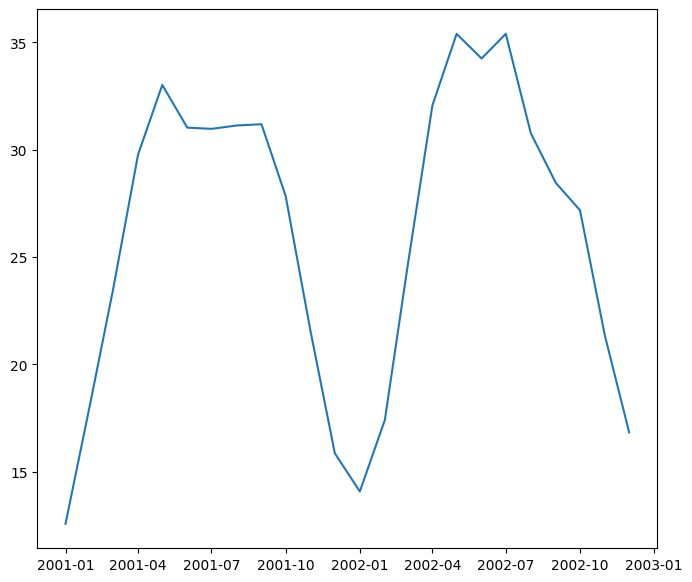

In [43]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(mnthavgdata['date'],mnthavgdata[' _temp'])

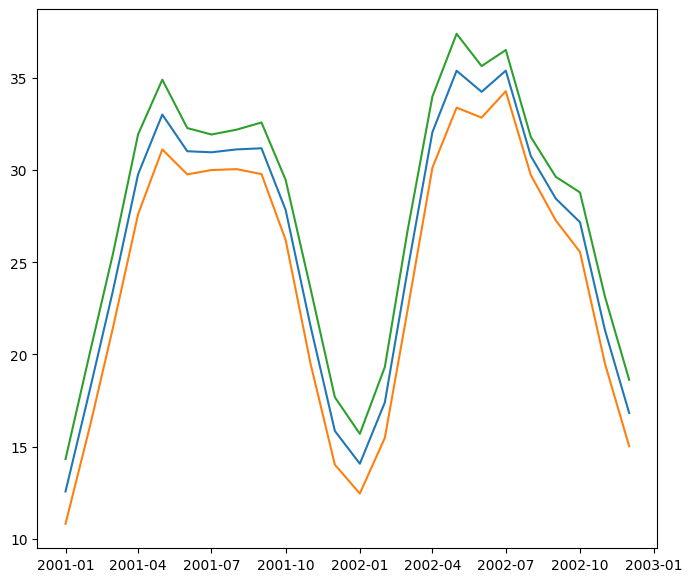

In [44]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(mnthavgdata['date'],mnthavgdata[' _temp'])
ax.plot(CIdates['date'],CIdates['lb'])
ax.plot(CIdates['date'],CIdates['ub'])

#### Plotting confidence intervals on top of monthly averaged data. 
#### ---> Question for you: Find out why it does not looks like that 95% data is not within the 95% CI curves

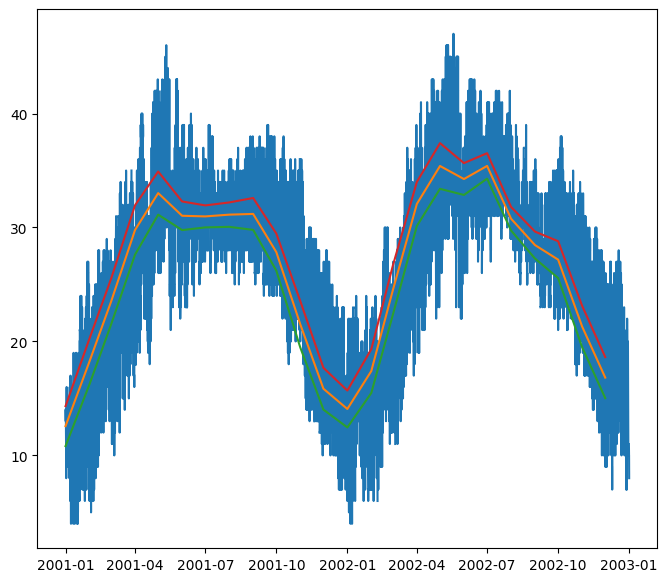

In [45]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(data2k1['datetime_utc'],data2k1[' _tempm'])
ax.plot(mnthavgdata['date'],mnthavgdata[' _temp'])
ax.plot(CIdates['date'],CIdates['lb'])
ax.plot(CIdates['date'],CIdates['ub'])

### Taking monthly data for regression analysis
 We will first use the monthly averaged data for the years 2001 to 2005 and split it into training and testing sets.

 Note to self for using the monthly average function:
 
 The order in which monthyl average function returns values is: avg,sdev,avgdew,sdevdew,avghum,sdevhum

In [46]:
data2k5=dataND.loc[dataND.year.isin([2001,2002,2003,2004,2005]),:]
avgR,sdevR,avgdewR,sdevdewR,avghumR,sdevhumR=monthlyavg(data2k5)

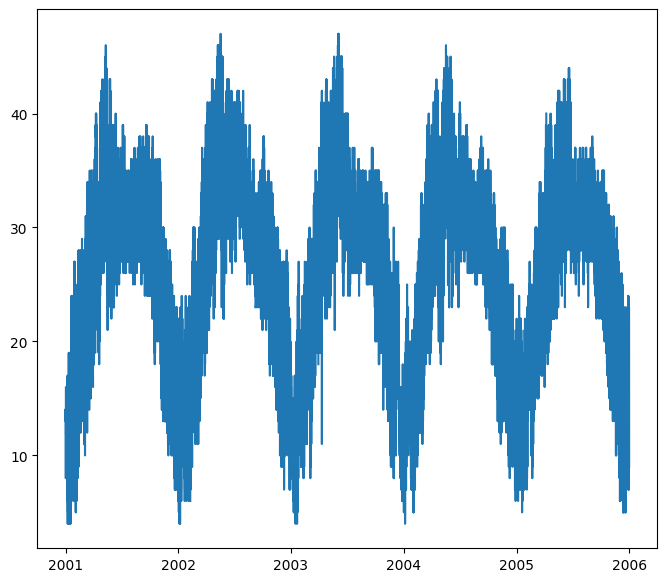

In [47]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(data2k5['datetime_utc'],data2k5[' _tempm'])

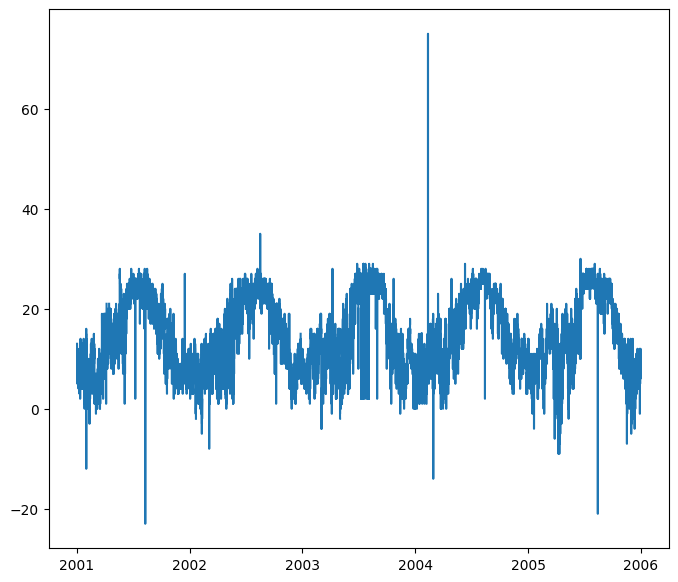

In [48]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(data2k5['datetime_utc'],data2k5[' _dewptm'])

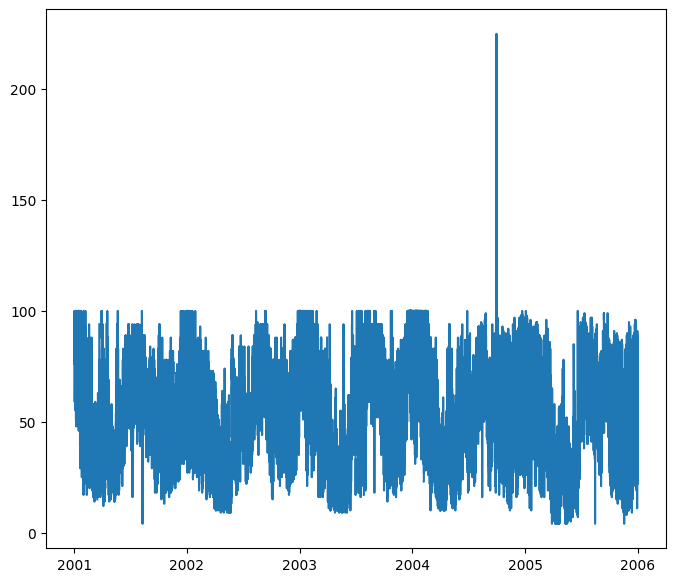

In [49]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(data2k5['datetime_utc'],data2k5[' _hum'])

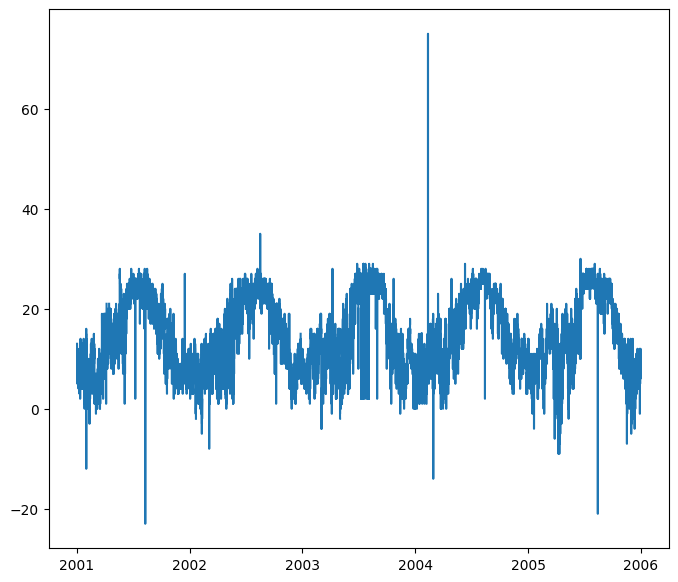

In [50]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(data2k5['datetime_utc'],data2k5[' _dewptm'])

In [51]:
mnth1= [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]*5

In [52]:
mnth1= [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]*5
yr1=[2001]*12
yr2=[2002]*12
yr3=[2003]*12
yr4=[2004]*12
yr5=[2005]*12
yr=yr1+yr2+yr3+yr4+yr5

In [53]:
avgdata = {' _temp': avgR,
        ' _dewptm': avgdewR,
     ' _hum': avghumR}
stdevdata = {' _temp': sdevR,
        ' _dewptm': sdevdewR,
     ' _hum': sdevhumR}


In [54]:
dfm = pd.DataFrame({'YEAR': yr, 'MONTH': mnth1})
dfm['DATE'] = pd.to_datetime(dfm[['YEAR', 'MONTH']].assign(DAY=1))

In [55]:
dfm

,YEAR,MONTH,DATE
0,2001,1,2001-01-01
1,2001,2,2001-02-01
2,2001,3,2001-03-01
3,2001,4,2001-04-01
4,2001,5,2001-05-01
5,2001,6,2001-06-01
6,2001,7,2001-07-01
7,2001,8,2001-08-01
8,2001,9,2001-09-01
9,2001,10,2001-10-01


In [56]:
mnthavgdataR0 = pd.DataFrame(avgdata)
mnthstdevdataR0=pd.DataFrame(stdevdata)

In [57]:
mnthavgdataR0['date']=dfm['DATE']
mnthstdevdataR0['date']=dfm['DATE']

In [58]:
cols={'date',' _temp',' _dewptm',' _hum'}

In [59]:
mnthavgdataR0=mnthavgdataR0[cols]
mnthstdevdataR0=mnthstdevdataR0[cols]

TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [60]:
mnthavgdataR0

,_temp,_dewptm,_hum,date
0,12.568436,7.829847,76.696927,2001-01-01
1,18.241270,7.112698,51.880952,2001-02-01
2,23.494737,7.561086,39.099548,2001-03-01
3,29.781388,14.159527,42.974889,2001-04-01
4,33.019526,16.450488,39.889819,2001-05-01
5,31.029197,21.697810,59.478832,2001-06-01
6,30.973164,24.524683,69.659605,2001-07-01
7,31.128134,22.930362,63.412256,2001-08-01
8,31.190202,19.135447,51.226225,2001-09-01
9,27.841410,15.517647,50.770588,2001-10-01


In [61]:
mnthstdevdataR0

,_temp,_dewptm,_hum,date
0,4.902634,2.899825,20.862386,2001-01-01
1,5.607722,3.197469,18.281749,2001-02-01
2,5.603199,4.474374,16.391120,2001-03-01
3,6.051923,2.864949,19.988866,2001-04-01
4,5.289885,3.434888,16.253582,2001-05-01
5,3.510862,3.161919,15.396224,2001-06-01
6,2.696118,1.524977,12.768637,2001-07-01
7,2.991215,2.712428,14.691724,2001-08-01
8,3.911649,2.895208,15.847139,2001-09-01
9,4.546847,4.611652,19.026074,2001-10-01


### Creating a linear regression model to predict monthly temperature
#### We will use the following regression model
AvgTemp = a + b (AvgDew) + c (AvgHum)    

In [62]:
mnthavgdataR0=mnthavgdataR0.dropna() ##Removing missing values

In [63]:
##Identifiying regressors X--(humidity, dewpoint) and dependent variables Y--(Temp)

In [69]:
mnthavgdataR0

,_temp,_dewptm,_hum,date
0,12.568436,7.829847,76.696927,2001-01-01
1,18.241270,7.112698,51.880952,2001-02-01
2,23.494737,7.561086,39.099548,2001-03-01
3,29.781388,14.159527,42.974889,2001-04-01
4,33.019526,16.450488,39.889819,2001-05-01
5,31.029197,21.697810,59.478832,2001-06-01
6,30.973164,24.524683,69.659605,2001-07-01
7,31.128134,22.930362,63.412256,2001-08-01
8,31.190202,19.135447,51.226225,2001-09-01
9,27.841410,15.517647,50.770588,2001-10-01


In [70]:
X= mnthavgdataR0[[' _dewptm', ' _hum']]

In [71]:
Y=mnthavgdataR0[[' _temp']]

In [72]:
from sklearn.model_selection import train_test_split

### We have to be careful while shuffling the data at the time of splitting into testing and training sets

train_test_split(a,test_size=0.2,shuffle=False)# using argument for shuffle as false doesnot reshuffle the data. 
                                 #This may be important when dealing with time series data
                                 #value of test_size decides the size of the test data. 0.2 means 20 percent of data 
                                #are used for testing while 80 percent data are used for training the model
    

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,shuffle=False)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [75]:
reg = LinearRegression()#creating a regression model
reg.fit(X_train, Y_train) #fitting the model

LinearRegression()

In [76]:
#predicting temperature using X_test data once regression parameters are obtained.
y_hat = reg.predict(X_test) 

In [77]:
#regression parameters
reg.coef_

array([[ 1.0055855 , -0.35314311]])

In [78]:
reg.score(X_train,Y_train)

0.9713983316333122

In [79]:
testrmse = (np.sqrt(mean_squared_error(Y_test, y_hat))) #root mean squared error 

testr2 = r2_score(Y_test, y_hat) #accuracy

In [80]:
testr2

0.9060536148192081

#### ----> Question for you: What is the meaning/diffrerence of the mean squared error,r2_score, reg.score?

### This is where we look at p-values to understand the importance of regressors
from sklearn.feaure_selection import f_regression. This is helpful in getting pvalues in sklearn

In [81]:
from sklearn.feature_selection import f_regression

In [82]:
f_regression(X_train,Y_train)

/home/shakir/gslprogrames/USFPostdoc/StatisticsnMachineLearning/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([39.41322489, 16.1793613 ]), array([1.10786746e-07, 2.12468178e-04]))

In [83]:
pvalues=f_regression(X_train,Y_train)[1]

/home/shakir/gslprogrames/USFPostdoc/StatisticsnMachineLearning/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
pvalues

array([1.10786746e-07, 2.12468178e-04])

In [85]:
pvalues.round(6)

array([0.      , 0.000212])

In [86]:
testrmse

2.1549121870044368

## ----->Task for you: Put all the indicators of accuracy and significance into a dataframe.

### Next we plot the original time series and predicted time series

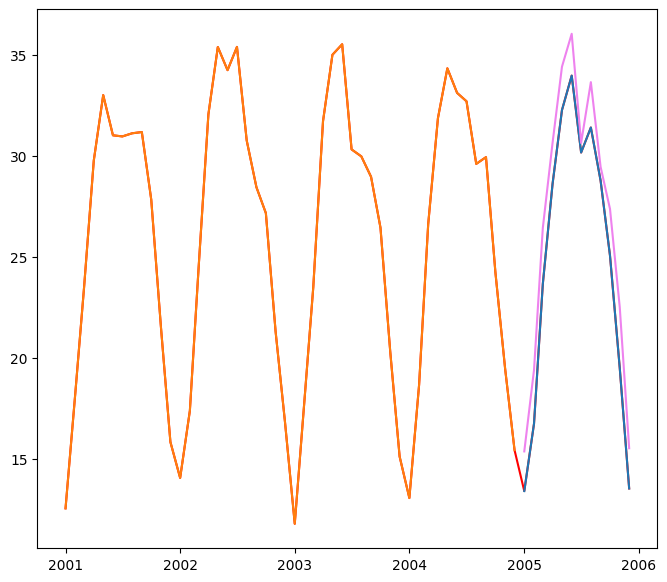

In [87]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(mnthavgdataR0['date'],mnthavgdataR0[' _temp'],'r')#Ploting oringial monthly averaged time series data
ax.plot(mnthavgdataR0['date'][48:],Y_test)#plotting training time series
ax.plot(mnthavgdataR0['date'][0:48],Y_train)#Plot original time series in the predicted region
ax.plot(mnthavgdataR0['date'][48:],y_hat,'violet')#plot predicted time series data


#### Once we have linear regression parameters
#### we predict temperature into the future based on dewpoint and humidity data
#### Then compare predicted temperature against observed temperature data for this period.

In [88]:
#Predction and comparsion will be done for data from 2006 to 2010
data2k10=dataND.loc[dataND.year.isin([2005,2006,2007,2008,2009,2010]),:]
avgRn,sdevRn,avgdewRn,sdevdewRn,avghumRn,sdevhumRn=monthlyavg(data2k10)

In [89]:
mnth1= [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]*6
yr1=[2005]*12
yr2=[2006]*12
yr3=[2007]*12
yr4=[2008]*12
yr5=[2009]*12
yr6=[2010]*12
yr=yr1+yr2+yr3+yr4+yr5+yr6

#### Creating a 'date' column to keep track of time.

In [90]:
avgdatan = {' _temp': avgRn,
        ' _dewptm': avgdewRn,
     ' _hum': avghumRn}
stdevdatan = {' _temp': sdevRn,
        ' _dewptm': sdevdewRn,
     ' _hum': sdevhumRn}


dfm1 = pd.DataFrame({'YEAR': yr, 'MONTH': mnth1})
dfm1['DATE'] = pd.to_datetime(dfm1[['YEAR', 'MONTH']].assign(DAY=1))
mnthavgdataR0n = pd.DataFrame(avgdatan)
mnthstdevdataR0n=pd.DataFrame(stdevdatan)
mnthavgdataR0n['date']=dfm1['DATE']#Creating a 'date' column to keep track of time.
mnthstdevdataR0n['date']=dfm1['DATE']#Creating a 'date' column to keep track of time.



#### Separating observed data for dewpoint and humidity and temperature

In [92]:
Xn= mnthavgdataR0n[[' _dewptm',' _hum']]
Yn=mnthavgdataR0n[' _temp']

 #### Predicting the values

In [93]:
y_hatn = reg.predict(Xn) #predicting the values

#### Ploting predcted and observed temperature

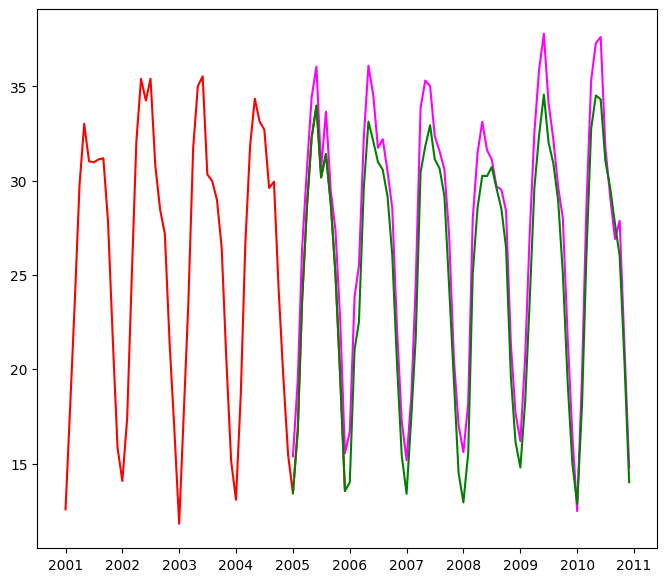

In [94]:
fig, ax = plt.subplots(figsize = (8,7))
ax.plot(mnthavgdataR0['date'],mnthavgdataR0[' _temp'],'r')#plot original time series data from January 2001 to December 2004 
ax.plot(mnthavgdataR0n['date'],y_hatn,'magenta')#plot predicted time series data from January 2005 to December 2010
ax.plot(mnthavgdataR0n['date'],mnthavgdataR0n[' _temp'],'green')#plot original time series data from 2005 to 2010

In [96]:
# fig, ax = plt.subplots(figsize = (8,7))
# #Ploting the zero reference 
# ax.plot(mnthavgdataR0['date'][48:],Y_test-Y_test)
# ax.plot(mnthavgdataR0n['date'],mnthavgdataR0n[' _temp']-mnthavgdataR0n[' _temp'],'magenta')#plot predicted time series data

# #Ploting the differnece between observed and predicted temperature values 

# ax.plot(mnthavgdataR0['date'][48:],Y_test-y_hat)

# ax.plot(mnthavgdataR0n['date'],mnthavgdataR0n[' _temp']-y_hatn,'magenta')#plot predicted time series data


## Additonal suggested excercises.
1) Increase more regressors and see if the error reduces

2) Try another model for temperature prediction. Explain the model you chose and justify it's use.

3) Predict one of the categorial variables using logistic regression. Can try atleast one other relevant models

4) Write a sumarizing report on what all this means in terms of accuracy of predictions, a) assuming you were a meterologists b) assuming you are interested in tempereature depdenet seasonal variations of mosquito populations.

5) Include any other analysis you think will be usefull or will add insight.